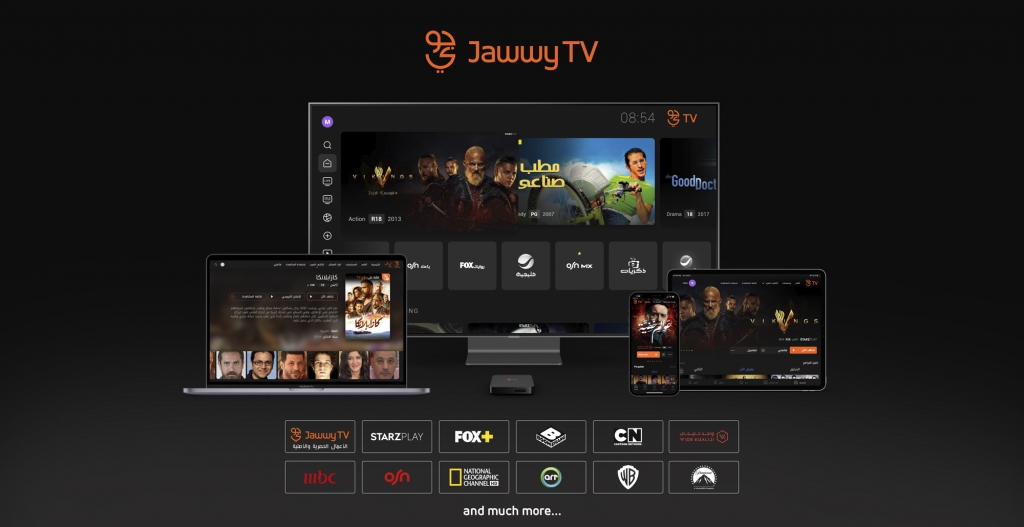

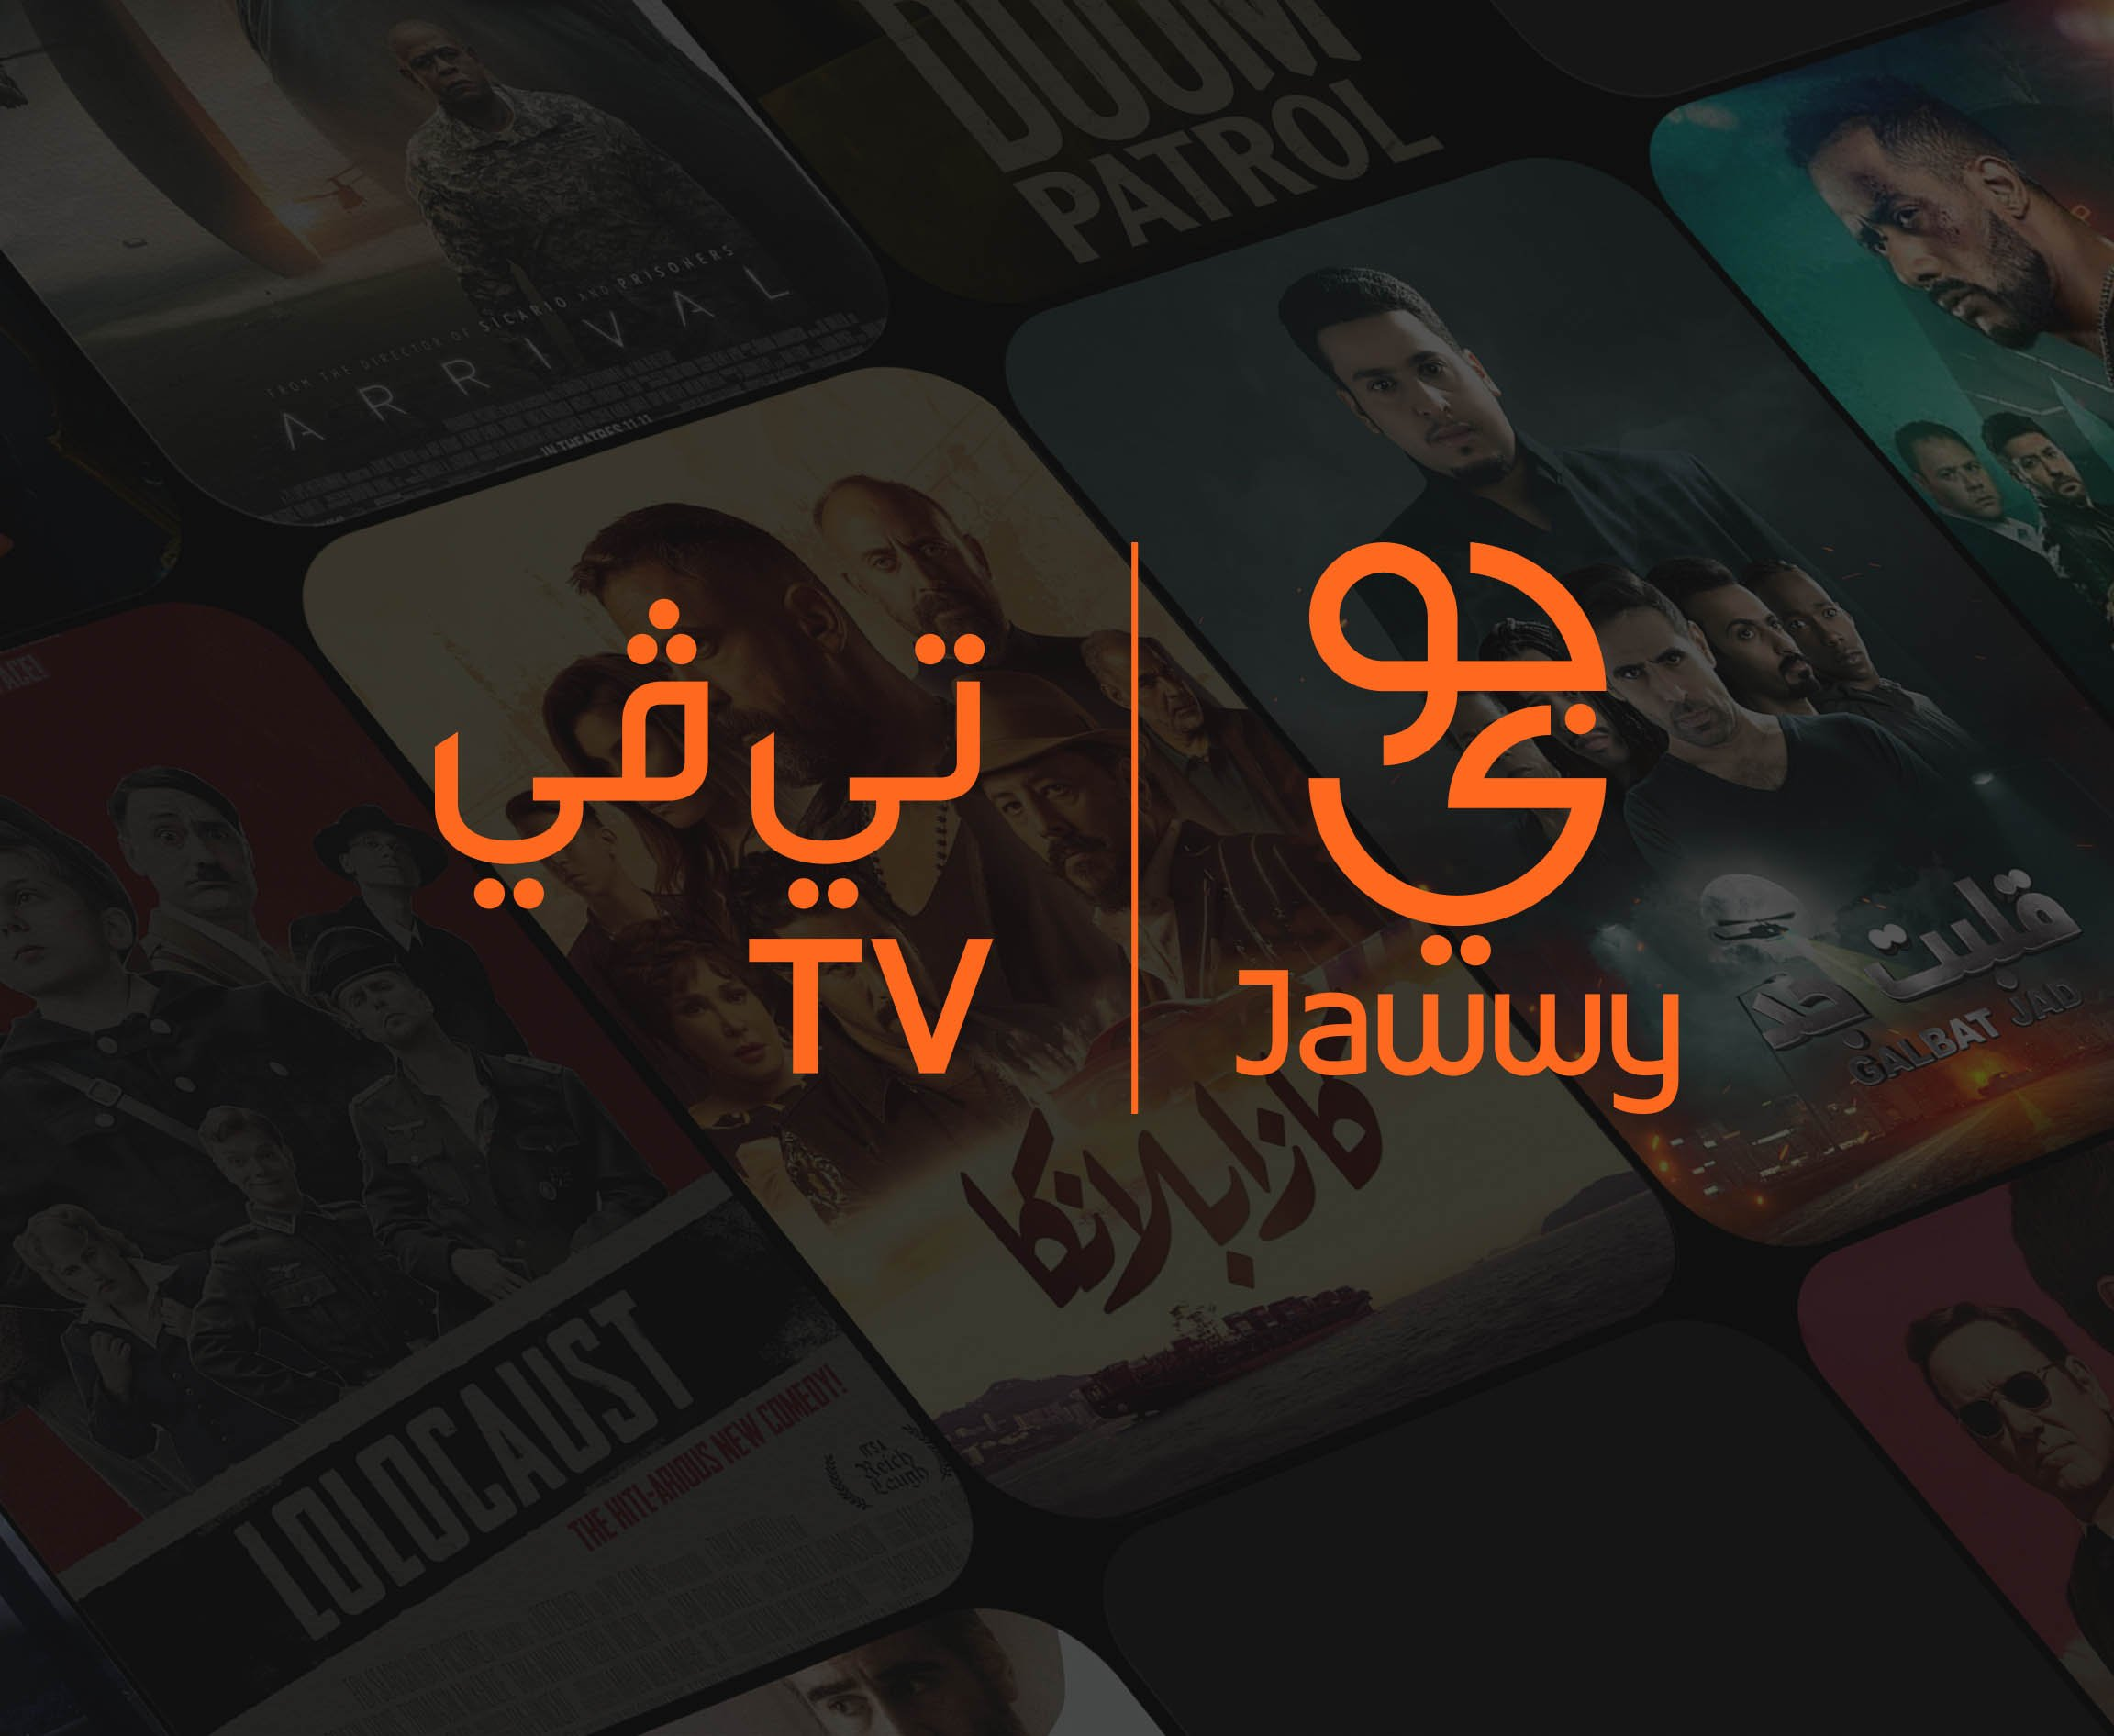

***What is Jawwy***
Jawwy is a new mobile plan from STC.
It's digital-first, works off an app, and customers can personalize, monitor, and manage their plans in real-time.
With the help of Saudi youth, they've taken a human-centered approach to designing their service & experience.
And they've used digital technology to offer completely new ways of becoming aware and knowing more, buying and receiving, using and managing, and being cared for.
Finally, they’ve simplified pricing and offers, minimizing waste and maximizing value for the customers.
If you consider all of this, Jawwy represents real experience innovation in the telecoms category.
It's the first service of its kind in the MENA region.

***Jawwy TV*** is a digital entertainment service, that provides the best movies, TV shows, documentaries, kids’ programs, and more from top regional and international partners. You can also enjoy watching a wide range of original and exclusive content, in addition to several top local and international live TV channels, including free-to-air and encrypted choices. All are customized for you in one place/ account, so you can easily explore the content and create your watch list that combines all your favorites.

Why ***Jawwy TV***
*  25000+ videos 
*  Watching on multiple devices at the same time
*  Rewind TV, not to miss your favorite shows
*  Top live TV local and international channels
  including a wide range of Arabic and Western movies and TV shows along with 
* Ad-free for an uninterrupted viewing experience
* Parental control, so your kids can enjoy a safe entertainment experience
*   Cancel anytime without restrictions





# ***ABOUT THE DATA***
The data is from Saudi Telcom Company, through their 
[STC Open Dataset lab](https://lab.stc.com.sa/dataset/en/)

*  date_: Date when the user subscribed on Jawwy TV
* user_id_maped: Unique id of each user 
* program_name: Name of the show
* duration_seconds: Time duration of the show in seconds
* program_class: The category of a show, can be either a Movie or a TV Show 
* season: Number of seasons the shows have 
* episode: Number of episodes the shows have 
* program_desc: Show Description 
* program_genre: Genre of the show
* series_title: Name of the show
* hd: Quality of the show
* original_name: Name of the show

### **Ideas to consider**

- Recommender System is an unsupervised learning technique Its powerful in business, all of the big tech companies google, facebook, amazon use powerful recommendation system to exband their business.

-- Two main types of recommender systems:

**Content based filtering**
consider user's preferences on the features of the dataset.
However needs more data on user's preference to get the best match.
**Collaberative based filtering**
consider user to user prefrences for recommending.
needs a large dataset of active users rating products


***IMPORTING LIBRARIES***

In [1]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import missingno #Library missingno will be required to visualize missing values in the data.
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


***DATA DESCRIPTION AND DATA CLEANING***

*  ***Import Data***



In [2]:
# import the dataset
jawwy_tv = pd.read_csv('./Final_Dataset.csv')

# dimension of the data:
print(f'The Dataset Contain {jawwy_tv.shape[0]} Rows and {jawwy_tv.shape[1]} Columns')

# make a copy of the data
df = jawwy_tv.copy()

The Dataset Contain 1048575 Rows and 13 Columns


In [3]:
# print all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

Unnamed: 0    date_  user_id_maped           program_name  \
0           1  5/27/17          26138             100 treets   
1           3  5/21/17           7946                 Moana    
2           4  8/10/17           7418  The Mermaid Princess    
3           5  7/26/17          19307  The Mermaid Princess    
4           7   7/7/17          15860             Churchill    

   duration_seconds program_class  season  episode  \
0                40         MOVIE       0        0   
1                17         MOVIE       0        0   
2                 8         MOVIE       0        0   
3                76         MOVIE       0        0   
4                87         MOVIE       0        0   

                               program_desc program_genre  series_title  hd  \
0                    Drama Movie100 Streets         Drama             0   0   
1                 Animation MovieMoana (HD)     Animation             0   1   
2  Animation MovieThe Mermaid Princess (HD)     Animation             0   1   
3  Animation MovieThe Mermaid Princess (HD)     Animation             0   1   
4             Biography MovieChurchill (HD)     Biography             0   1   

          original_name  
0            100 treets  
1                 Moana  
2  The Mermaid Princess  
3  The Mermaid Princess  
4             Churchill

In [4]:
#Check Data Types
df.dtypes

Unnamed: 0           int64
date_               object
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_desc        object
program_genre       object
series_title         int64
hd                   int64
original_name       object
dtype: object

In [5]:
# extract year and month from string format date
df['year'] = pd.DatetimeIndex(df['date_']).year
df['month'] = pd.DatetimeIndex(df['date_']).month

In [6]:
# rename columns names
df.rename(columns={"date_": "date", "user_id_maped": "user_id"} ,inplace=True)

In [7]:
df['Unnamed: 0'].value_counts()

1          1
837296     1
837280     1
837281     1
837282     1
          ..
422154     1
422155     1
422156     1
422157     1
1247852    1
Name: Unnamed: 0, Length: 1048575, dtype: int64

The columns has no added value so we will drop it

In [8]:
# Dropping unneeded column:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df.describe()

user_id  duration_seconds        season       episode  \
count  1.048575e+06      1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.709266e+04      1.230957e+03  1.342139e+00  6.157952e+00   
std    1.003513e+04      6.821058e+03  2.104095e+00  1.222015e+01   
min    1.000000e+00      2.000000e+00  0.000000e+00  0.000000e+00   
25%    8.253000e+03      5.200000e+01  0.000000e+00  0.000000e+00   
50%    1.714900e+04      1.190000e+02  1.000000e+00  1.000000e+00   
75%    2.566500e+04      1.328000e+03  1.000000e+00  9.000000e+00   
max    3.428000e+04      1.461329e+06  2.300000e+01  2.820000e+02   

       series_title            hd          year         month  
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  
mean   1.205922e-02  3.862728e-01  2.017303e+03  5.972074e+00  
std    1.091504e-01  4.868946e-01  4.596873e-01  3.444155e+00  
min    0.000000e+00  0.000000e+00  2.017000e+03  1.000000e+00  
25%    0.000000e+00  0.000000e+00  2.017000e+03  3.000000e+00  
50%    0.000000e+00  0.000000e+00  2.017000e+03  5.000000e+00  
75%    0.000000e+00  1.000000e+00  2.018000e+03  9.000000e+00  
max    1.000000e+00  1.000000e+00  2.018000e+03  1.200000e+01

In [10]:
df.describe(exclude = 'number')

date    program_name    program_class  \
count   1048575         1048575          1048575   
unique      411            8270                2   
top     4/21/17  The Boss Baby   SERIES/EPISODES   
freq       4512           23625           560174   

                             program_desc program_genre original_name  
count                             1034537       1048575       1048575  
unique                              11176            16          1795  
top     Animation MovieThe Boss Baby (HD)     Animation     Friends    
freq                                23625        401730         32997

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1048575 non-null  object
 1   user_id           1048575 non-null  int64 
 2   program_name      1048575 non-null  object
 3   duration_seconds  1048575 non-null  int64 
 4   program_class     1048575 non-null  object
 5   season            1048575 non-null  int64 
 6   episode           1048575 non-null  int64 
 7   program_desc      1034537 non-null  object
 8   program_genre     1048575 non-null  object
 9   series_title      1048575 non-null  int64 
 10  hd                1048575 non-null  int64 
 11  original_name     1048575 non-null  object
 12  year              1048575 non-null  int64 
 13  month             1048575 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 112.0+ MB


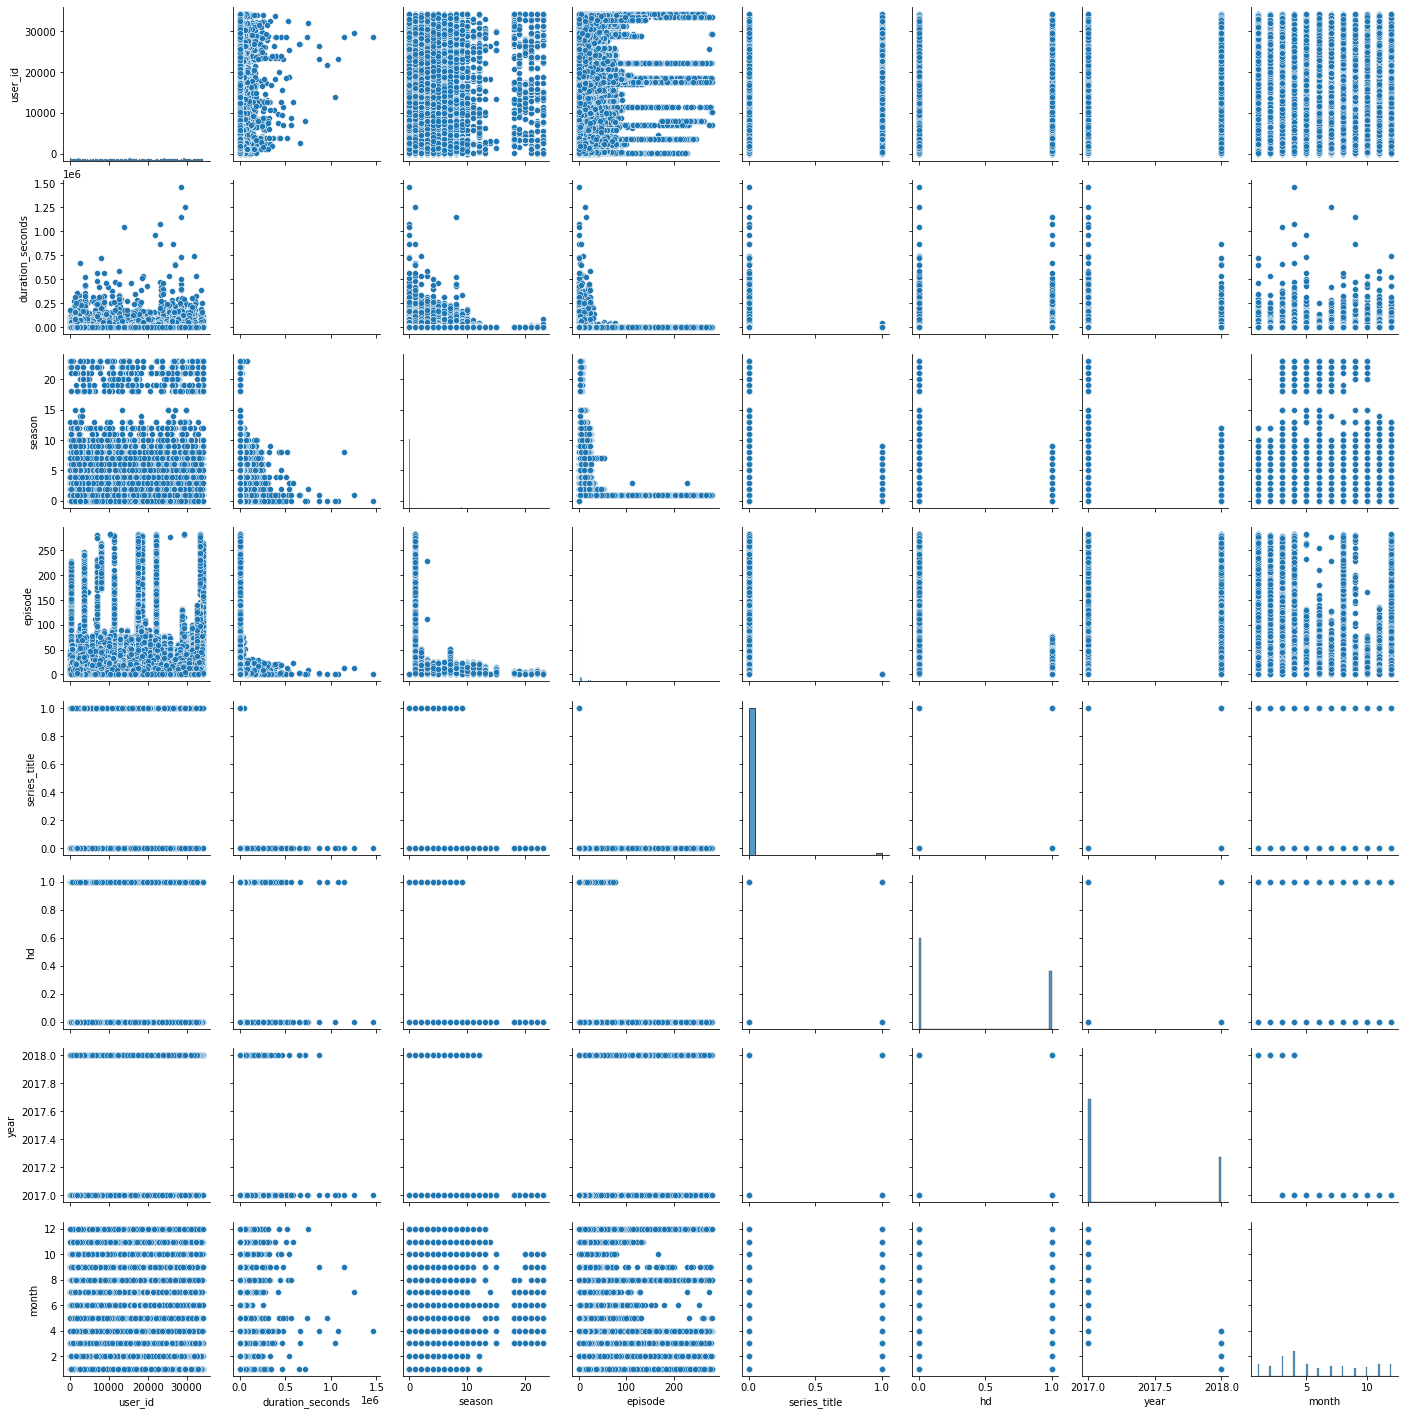

In [12]:
sns.pairplot(df,palette=['#4F008C',"#FF6A39"]);



*   ***Missing values***




In [13]:
df.isna().sum()

date                    0
user_id                 0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
year                    0
month                   0
dtype: int64

In [14]:
# Center plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

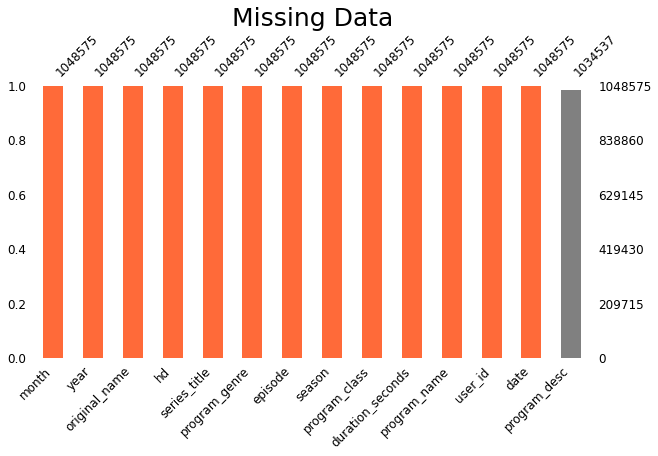

In [15]:
# ploting the missing values in the dataset
color = ['#FF6A39' ,'#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','#FF6A39','grey']
missingno.bar(df,fontsize =12, color = color, sort = 'descending', figsize = (10,5))
plt.title("Missing Data",fontsize=25)
plt.show()

- On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

- On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

- Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

*Values are only Missing From program_desc*

In [16]:
# print date range
print("This dataset covers the years from", df["year"].min(),"to {}.".format(df["year"].max()))

This dataset covers the years from 2017 to 2018.


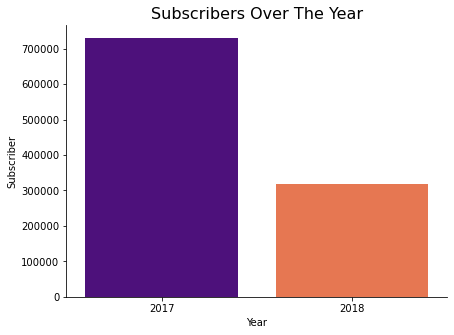

In [17]:
# creating a subplot
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(data= df, x=df['year'], palette=['#4F008C',"#FF6A39"])
plt.title("Subscribers Over The Year",fontsize=16)
plt.xlabel('Year')
plt.ylabel('Subscriber')
sns.despine()
plt.show()

We can see that year 2017 have the Most subscriber for Jawwy TV, but lets look deeper into each month to find out the reason behind this difference.

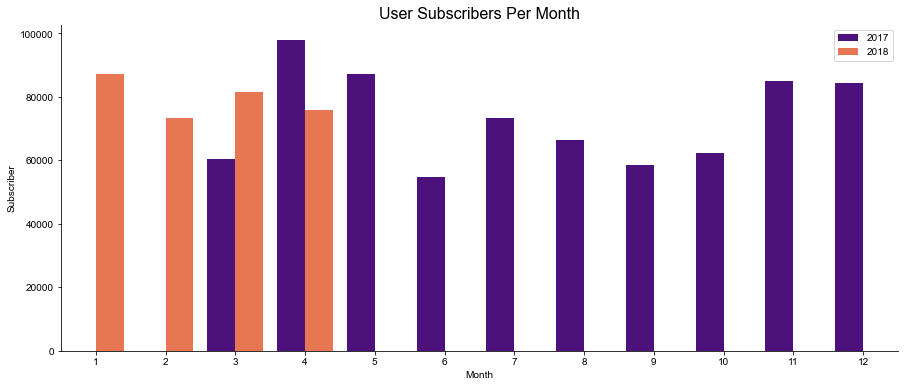

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x= df['month'],hue=df['year'],palette=['#4F008C',"#FF6A39"])
plt.legend(loc=1)
plt.title("User Subscribers Per Month",fontsize=16)
plt.xlabel('Month')
plt.ylabel('Subscriber')
sns.set_theme(style="white")
sns.despine()
plt.show()

From here we can see that the only months included in this dataset are January till April, that led to the previous number of subscribers difference.
However, highest months in 2017 are April followed by May, September and December. while the lowest month is June.

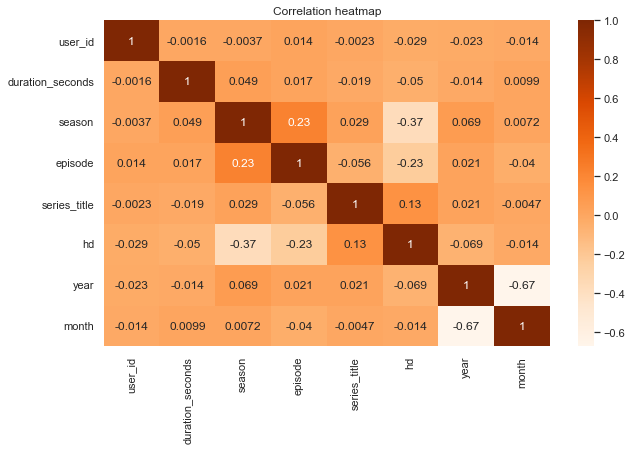

In [19]:
corrMatrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrMatrix, annot=True, cmap='Oranges')
plt.title("Correlation heatmap")
plt.show()

In [21]:
df['program_class'].unique()

array(['MOVIE', 'SERIES/EPISODES'], dtype=object)

In [22]:
# repalce names 
df['program_class'] = df['program_class'].replace({'MOVIE': 'Movie','SERIES/EPISODES': 'Tv Series'})

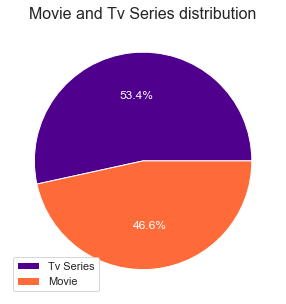

In [23]:
plt.figure(figsize=(14,5))
series = df['program_class'].value_counts() # The labels of the bar chart
labels = series.index
values = series.values
plt.pie(values, autopct = '%1.1f%%', colors =['#4F008C',"#FF6A39"], textprops={'color':"w"})
plt.legend(labels,loc=3)
plt.title('Movie and Tv Series distribution', fontsize=16);

In [24]:
df['program_genre'].unique()

array(['Drama', 'Animation', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Crime', 'Family',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

In [25]:
# repalce names 
df['program_genre'] = df['program_genre'].replace({'NOT_DEFINED_IN_UMS':'Other',
                                                   'SERIES_NOT_ADDED_UNDER_ANY_GENRE':'Other'})

In [26]:
df['program_genre'].value_counts()

Animation      401730
Action         174155
Drama          155048
Comedy         136577
Horror          75306
Thriller        39601
Family          26668
Biography       16135
Documentary     13291
Other            4751
Crime            3232
Sci-Fi           1322
Romance           512
Adventure         239
Wrestling           8
Name: program_genre, dtype: int64

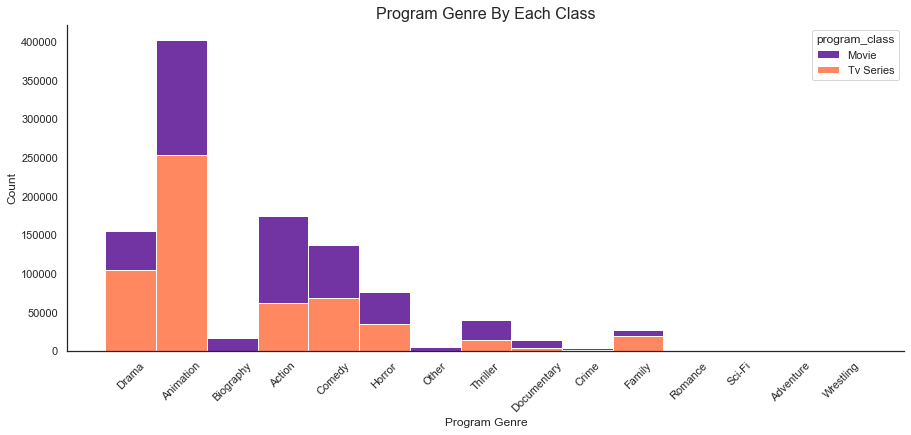

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(
    df,
    x="program_genre",
    hue="program_class", # this feature has to be categorical
    multiple="stack",
    alpha=0.8,
    palette=['#4F008C',"#FF6A39"]
)
plt.title('Program Genre By Each Class', fontsize= 16)
plt.xlabel('Program Genre')
plt.tick_params(axis='x', rotation=45)
sns.set_theme(style="white")
sns.despine()
plt.show()

In [28]:
df1=df[['program_class','month']]
df2=df1.groupby(['month','program_class']).size().reset_index(name='Total Content')
fig = px.line(df2, x="month", y="Total Content", color='program_class',
              title='Trend Of Content Type Over Months', template="simple_white",
             color_discrete_map={ # replaces default color mapping by value
                "Movie": "#4F008C", "Tv Series": "#FF6A39"})
fig.show()

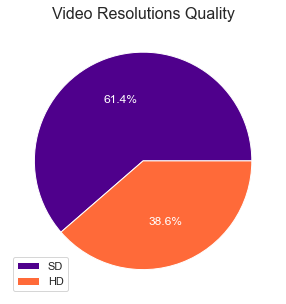

In [29]:
plt.figure(figsize=(12,5))
series = df['hd'].value_counts() # The labels of the bar chart
labels = series.index
values = series.values
plt.pie(values, autopct = '%1.1f%%', colors =['#4F008C',"#FF6A39"],
       textprops={'color':"w"})
plt.legend(labels= ['SD', 'HD'],loc='lower left')
plt.title('Video Resolutions Quality', fontsize=16);

In [30]:
genres=list(df['original_name'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

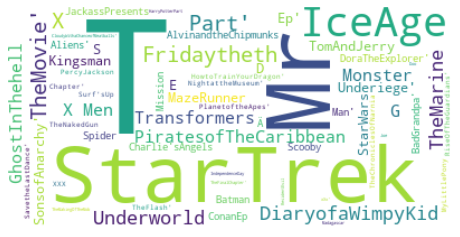

In [31]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (8, 5)

wordcloud = WordCloud(max_words=1000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

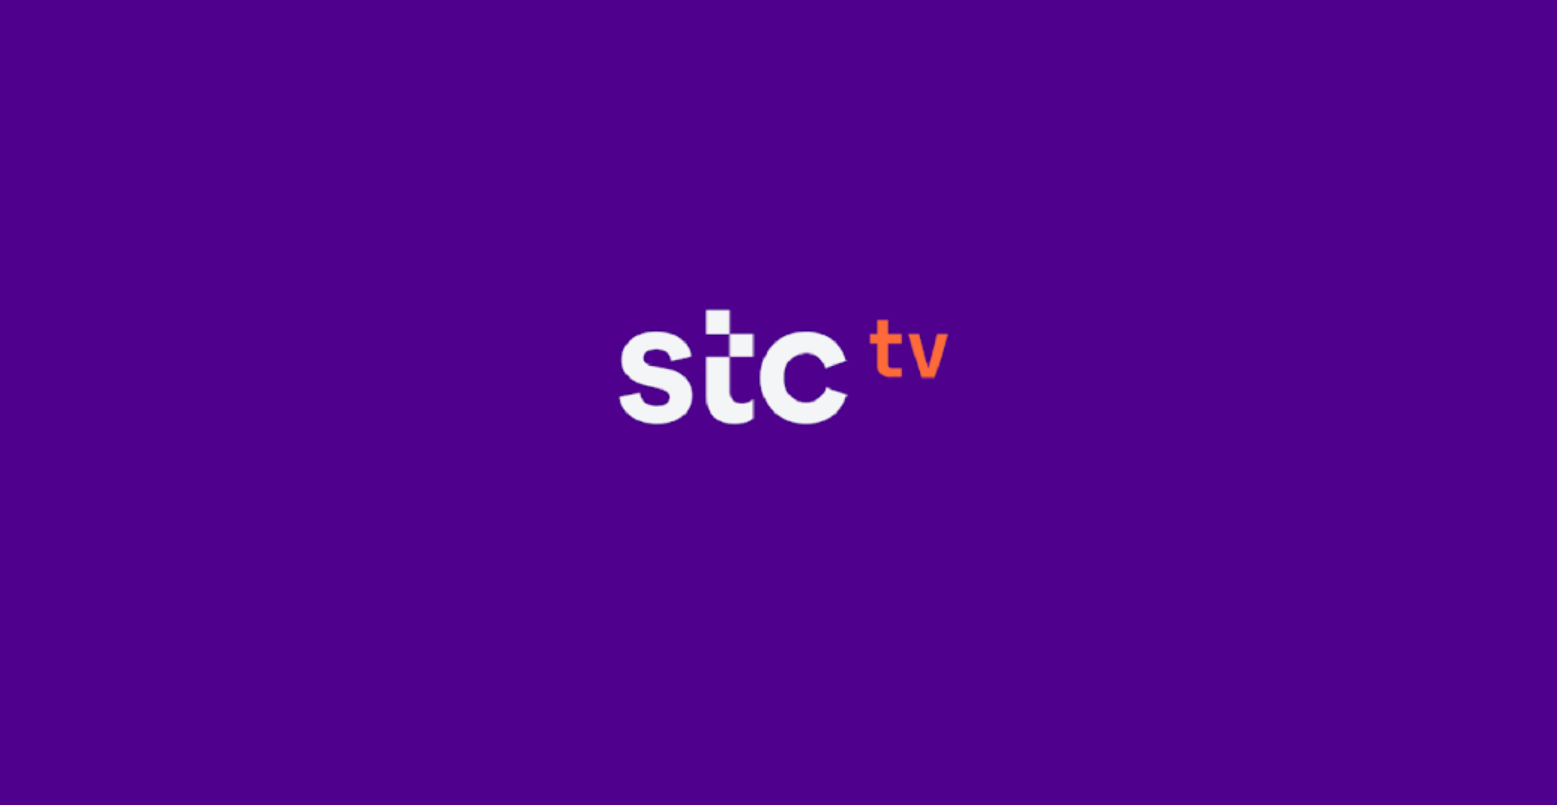

<center><h1><span style="color:#FF6A39">Thank you</span> <span style="color:#4F008C">for your attention :) </h1></span></center>